In [21]:
%matplotlib inline
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
# print(plt.style.available)  # show available template
plt.style.use(['seaborn-ticks','seaborn-paper'])  # use a templet

import matplotlib as mpl
# mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'
params = {
    'figure.figsize': [8, 6], # Note! figure unit is inch!  scale fontz size 2.54 to looks like unit cm
    'axes.labelsize': 8*2.54, # scale 2.54 to change to figure unit looks as cm
    'font.size':  7*2.54,
    'lines.linewidth':2,
    'legend.fontsize': 6.7*2.54,
    'xtick.labelsize': 6.7*2.54,
    'ytick.labelsize': 6.7*2.54,
    'text.usetex': False,  
    'xtick.direction': "in",
    'ytick.direction': "in", # ticket inside
    'legend.frameon' : True, 
    'legend.edgecolor': 'black',
    'legend.shadow': True,
    'legend.framealpha':1,
#     'patch.linewidth' : 0.5, 
}
mpl.rcParams.update(params)

In [2]:
import numpy as np
v = 2*np.pi ## MHz
yeta = 0.1
n = 5
t1 = 0.1
t2 = 0.05
t3 = 0.02
z = [-2*n, 3*n, -2*n, 2*n, -3*n, 2*n]
t = [-t1, -t2, -t3, t3, t2, t1]

In [3]:
c_c = 0
c_r = 0
theta = 0
N = len(z)
for i in range(N):
    c_c = c_c + z[i] * np.exp(-1j*v*t[i])
    c_r = c_r + z[i] * np.exp(-1j*np.sqrt(3)*v*t[i])

for i in range(N-1):
    for j in range(i-1):
        theta = theta + z[i]*z[j] * ( np.sin(v*(t[i]-t[j])) - np.sin(np.sqrt(3)*v*(t[i]-t[j]))/np.sqrt(3) )
theta = theta*yeta**2
print(c_c,c_r,theta)

-4.991859885887127j (8.881784197001252e-16-6.504958194289224j) 0.17209873540687856


In [4]:
def dis(z_list,t_list,v):
    c_c = 0
    c_r = 0
    theta = 0
    N = len(z_list)
    T_list =  np.append([-t for t in t_list[::-1]],t_list)
    
    for i in range(N):
        c_c = c_c + z_list[i] * 1j*np.exp(-1j*v*(T_list[i]-T_list[0]))
        c_r = c_r + z_list[i] * 1j*np.exp(-1j*np.sqrt(3)*v*(T_list[i]-T_list[0]))

    for i in range(1,N):
        for j in range(i-1):
            theta = theta + z_list[i]*z_list[j] * ( np.sin(v*(T_list[i]-T_list[j])) - np.sin(np.sqrt(3)*v*(T_list[i]-T_list[j]))/np.sqrt(3) )
    theta = theta*yeta**2
    return abs(c_c), abs(c_r), theta, 1/12*(6+np.exp(-4*abs(c_c)**2)+np.exp(-4*abs(c_r)**2)+4*np.exp(-(abs(c_r)**2+abs(c_c)**2))*abs(np.sin(2*theta)))

In [11]:
def Dis(z_list,t_list,v,tt,e):
    c_c = 0
    c_r = 0
    theta = 0
    N = len(z_list)
    T_list =  np.append([-t for t in t_list[::-1]],t_list)
    ddt = tt * 1e-3
    dt = 0
    
    for i in range(N):
        dt = dt + abs(z_list[i]) * tt * 1e-3
        for j in range(int(abs(z_list[i]))):
            c_c = c_c + 1j*np.exp(-1j*v*(T_list[i]-T_list[0]-dt)) * e * np.sign(z_list[i])
            c_r = c_r + 1j*np.exp(-1j*np.sqrt(3)*v*(T_list[i]-T_list[0]-dt)) * e * np.sign(z_list[i])
            dt = -ddt + dt
    for i in range(1,N):
        for j in range(i-1):
            theta = theta + z_list[i]*z_list[j] * ( np.sin(v*(T_list[i]-T_list[j])) - np.sin(np.sqrt(3)*v*(T_list[i]-T_list[j]))/np.sqrt(3) )
    theta = theta*yeta**2
    return abs(c_c), abs(c_r), theta, (1-4*70*(1-e))*1/12*(6+np.exp(-4*abs(c_c)**2)+np.exp(-4*abs(c_r)**2)+4*np.exp(-(abs(c_r)**2+abs(c_c)**2))*abs(np.sin(2*theta)))

In [6]:
from scipy.optimize import minimize
1.683109109109109

1.683109109109109

In [7]:
v = 2*np.pi
n=5
z = [-2*n, 3*n, -2*n, 2*n, -3*n, 2*n]
x0 = [0.1,0.2,0.3]
fun = lambda x: dis(z,x,v)[0]+ dis(z,x,v)[1] + abs(np.pi/4-dis(z,x,v)[2])*1.683109109109109
res = minimize(fun, x0, tol = 1e-10)
print(res.success)
print(res.x)
print(dis(z,res.x,v))

False
[0.07017894 0.19848159 0.23456553]
(3.997512350885138e-07, 5.304145226830748e-08, 0.7853594399158341, 0.9999999990002195)


In [67]:
def draw(z_list,t_list,v):
#     ax = plt.axes()
    plt.xlim(-11,11)
    plt.ylim(-11,11)
    N = len(z_list)
    T_list =  np.append([-t for t in t_list[::-1]],t_list)
    x = 0
    y = 0
    X = 0
    Y = 0
    dt = 0
    for i in range(N):
        dt = dt + abs(z_list[i]) * 0.0002
        dx = (z_list[i] * 1j*np.exp(-1j*v*(T_list[i]-T_list[0]))).real
        dy = (z_list[i] * 1j*np.exp(-1j*v*(T_list[i]-T_list[0]))).imag
        dX = (z_list[i] * 1j*np.exp(-1j*v*(T_list[i]-T_list[0]+dt))).real * 0.998
        dY = (z_list[i] * 1j*np.exp(-1j*v*(T_list[i]-T_list[0]+dt))).imag * 0.998
        plt.arrow(x, y, dx, dy,head_width=0.1, head_length=0.1, fc='#32bab5', ec='#32bab5',width=0.15)
        plt.arrow(X, Y, dX, dY,head_width=0.1, head_length=0.1, fc='r', ec='r',width=0.15,ls='--')
        x = x + dx
        y = y + dy
        X = X + dX
        Y = Y + dY
        print(X,Y)

-0.12540907803585905 -9.979212021154083
3.710238186605813 4.491057847139556
-5.0899174193657535 -0.21613466121265823
4.080721628576213 -4.153110588540896
-0.890335096960384 9.967423927953066
0.08845074404362319 0.03553698349734091
-0.2172034612148885 -9.97763612567808
6.27798401239716 3.509892917205688
-3.2587419245189713 6.451195078519817
-6.030854597759143 -3.1360772826296905
8.786945289778144 -5.265327501110354
0.3253288006796957 0.026311790396317036


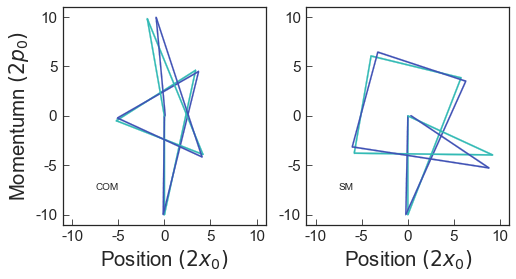

In [28]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.ylabel('Momentumn '+r'$(2p_0)$')
plt.xlabel('Position '+r'$(2x_0)$')
plt.text(-7.5, -7.5, 'COM')
plt.xticks([-10,-5,0,5,10],(-10,-5,0,5,10))
plt.yticks([-10,-5,0,5,10],(-10,-5,0,5,10))
draw(z,res.x,2*np.pi)
plt.subplot(1,2,2)
plt.xlabel('Position '+r'$(2x_0)$')
plt.text(-7.5, -7.5, 'SM')
plt.xticks([-10,-5,0,5,10],(-10,-5,0,5,10))
plt.yticks([-10,-5,0,5,10],(-10,-5,0,5,10))
draw(z,res.x,np.sqrt(3)*2*np.pi)
# ax = plt.subplot(2,2,3)
# plt.plot(range(1,11), p, 'o',ms=7,markeredgewidth=2, markeredgecolor='#3F51B5', markerfacecolor='#BBC2E7',label=r'$|0\rangle$')
# plt.plot(range(1,11), p1, 'o',ms=7,markeredgewidth=2, markeredgecolor='#32bab5', markerfacecolor='#63d5d1',label=r'$|1\rangle$')
# plt.plot(np.linspace(1,11,100),yvalsf,color ="#3F51B5",lw=2.5)
# plt.plot(np.linspace(1,11,100),yvalsf1,color ="#32bab5",lw=2.5)
# plt.xlabel('Flipping numbers')
# plt.ylabel('Infidelity')
# plt.xticks([4,8,12],(4,8,12))
# ax.ticklabel_format(axis='y',style='sci',scilimits=(0,4))
# # plt.yticks([0,0.0005,0.001,0.0015,0.002],(0,0.0005,0.001,0.0015,0.002))
# plt.legend(frameon=False)
# plt.subplot(2,2,4)
# def f(x, a):
#     return a*x**(-2/3)
# popt, pcov = curve_fit(f, np.linspace(4,15,12)*14, tao)
# plt.plot(np.linspace(4,15,12)*14,tao, 'o',ms=7,markeredgewidth=2, markeredgecolor='#3F51B5', markerfacecolor='#BBC2E7',label=r'$|0\rangle$')
# plt.plot(np.linspace(3,16,100)*14,f(np.linspace(3,16,100)*14,popt),color ="#3F51B5",lw=2.5)
# plt.ylabel('Gate time ($\mu$s)')
# plt.xlabel('Pulse numbers')
# plt.xticks([4,8,12,16],(4,8,12,16))
# plt.savefig('../fig/fiedlity_2.pdf')
# plt.savefig('../fig/ff_2.pdf')

In [ ]:
-0.12540907803585905 -9.979212021154083
3.7111919754213547 4.490804991849426
-5.089822750603296 -0.21478102822259437
4.079505300872216 -4.154809338327013
-0.8852038010213912 9.96795822095735
0.0884629152485551 0.03556811959563788

In [319]:
f = [0.9999999999935547, 0.9999998143715083, 0.9999998107232444, 0.9999999994623296,0.9999999152509818,0.9999999997512488,0.9999999999771388,0.9999999118731135,0.9999999373036601,0.9999999990052881,0.9999999998138784,0.9999999786530648]
tao = [0.28217393, 0.23518226, 0.20477646, 0.18294192, 0.16620536,0.15291939,0.14202595,0.13289291,0.12512934,0.11841115,0.11253093,0.10732653]
tao = 2*np.array(tao)
p=[0.0001394651445725259,
 0.00015708243117244655,
 0.0005221168210293375,
 0.0005249213844928935,
 0.0005575077525994775,
 0.0007305221201447415,
 0.0008244531793706473,
 0.0009080133612549002,
 0.0010408394167522594,
 0.0010482039518333597]
p1=[9.129491020497352e-05,
 0.00020369254983836066,
 0.0004353642953244252,
 0.0005510490828068025,
 0.000588817160067621,
 0.0006541807506955855,
 0.0009939967993850551,
 0.0014265821176313587,
 0.001454019927007777,
 0.0014950078063995509]

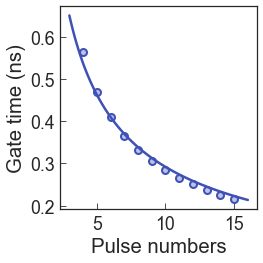

In [327]:
def f(x, a):
    return a*x**(-2/3)
popt, pcov = curve_fit(f, np.linspace(4,15,12), tao)
plt.figure(figsize=(4,4))
plt.plot(np.linspace(4,15,12),tao, 'o',ms=7,markeredgewidth=2, markeredgecolor='#3F51B5', markerfacecolor='#BBC2E7',label=r'$|0\rangle$')
plt.plot(np.linspace(3,16,100),f(np.linspace(3,16,100),popt),color ="#3F51B5",lw=2.5)
plt.ylabel('Gate time (ns)')
plt.xlabel('Pulse numbers')
plt.tight_layout()
plt.savefig('../fig/f9.pdf')


Text(0, 0.5, 'Infidelity')

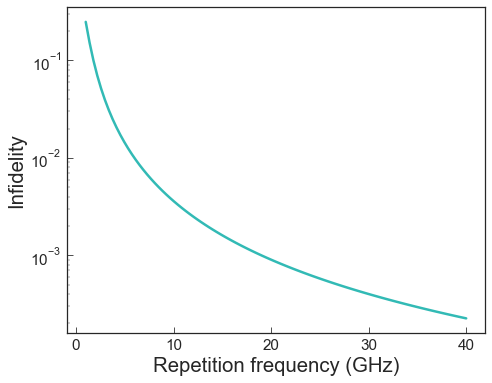

In [690]:
plt.figure(figsize=(7.5,6))
Z = np.array(z)*0.999
iff = np.zeros(100)
for i,f in enumerate(np.linspace(1,40,100)):
    X = np.array(res.x) + np.array(z[3:6])*1/f/1e3/5
    iff[i] = dis(Z,X)[3]
plt.semilogy(np.linspace(1,40,100),1-iff,color ="#32bab5",lw=2.5)
plt.xticks((0,10,20,30,40),[0,10,20,30,40])
plt.xlabel('Repetition frequency (GHz)')
plt.ylabel('Infidelity')
# plt.savefig('../fig/f5.pdf')

# 建立一个简单的模型理解kick的过程

In [9]:
## t in ns
def Draw(z_list,t_list,v,tt):
#     ax = plt.axes()
    plt.xlim(-11,11)
    plt.ylim(-11,11)
    N = len(z_list)
    T_list =  np.append([-t for t in t_list[::-1]],t_list)
    x = 0
    y = 0
    X = 0
    Y = 0
    dt = 0
    ddt = tt * 1e-3
    for i in range(N):
        dt = dt + abs(z_list[i]) * tt * 1e-3
        dx = (z_list[i] * 1j*np.exp(-1j*v*(T_list[i]-T_list[0]))).real
        dy = (z_list[i] * 1j*np.exp(-1j*v*(T_list[i]-T_list[0]))).imag
        plt.arrow(x, y, dx, dy,head_width=0.1, head_length=0.1, fc='#32bab5', ec='#32bab5',width=0.2)
        for j in range(int(abs(z_list[i]))):
            dX = (1j*np.exp(-1j*v*(T_list[i]-T_list[0]-dt))).real * 0.999 * np.sign(z_list[i])
            dY = (1j*np.exp(-1j*v*(T_list[i]-T_list[0]-dt))).imag * 0.999 * np.sign(z_list[i])
            plt.arrow(X, Y, dX, dY,head_width=0.1, head_length=0.1, fc='#3F51B5', ec='#3F51B5',width=0.2,ls='--')
            dt = -ddt + dt
            X = X + dX
            Y = Y + dY
        x = x + dx
        y = y + dy

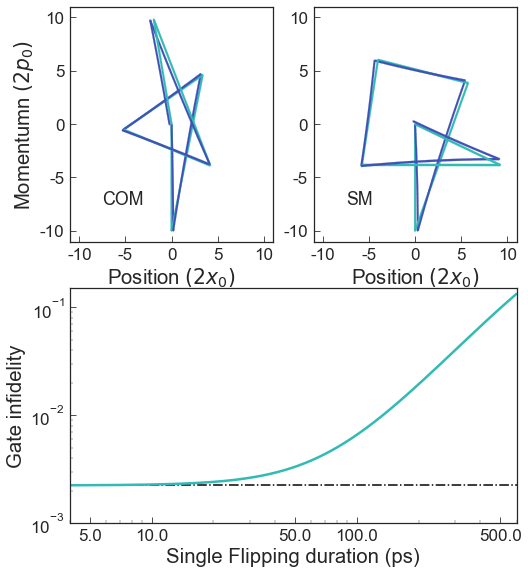

In [23]:
plt.figure(figsize=(8,9.5))
plt.subplot(2,2,1)
plt.ylabel('Momentumn '+r'$(2p_0)$')
plt.xlabel('Position '+r'$(2x_0)$')
plt.text(-7.5, -7.5, 'COM')
plt.xticks([-10,-5,0,5,10],(-10,-5,0,5,10))
plt.yticks([-10,-5,0,5,10],(-10,-5,0,5,10))
Draw(z,res.x,2*np.pi,0.5)
plt.subplot(2,2,2)
plt.xlabel('Position '+r'$(2x_0)$')
plt.text(-7.5, -7.5, 'SM')
plt.xticks([-10,-5,0,5,10],(-10,-5,0,5,10))
plt.yticks([-10,-5,0,5,10],(-10,-5,0,5,10))
Draw(z,res.x,2*np.pi*np.sqrt(3),0.5)
plt.subplot(2,1,2)
e=0.999992
plt.xlim(4,600)
plt.ylim(0.001,0.15)
TT = np.linspace(0.004,0.6,1000)
plt.loglog(TT*1e3, 1-Dis(z,res.x,v,TT,e)[-1],color ="#32bab5",lw=2.5)
plt.hlines(4*(1-e)*70,4,600,linestyles='dashdot',lw=1.5)
plt.xticks([5,10,50,100,500],(5.0,10.0,50.0,100.0,500.0))
plt.ylabel('Gate infidelity')
plt.xlabel('Single Flipping duration (ps)')
plt.savefig('../fig/fidelity_4_part_1.pdf')

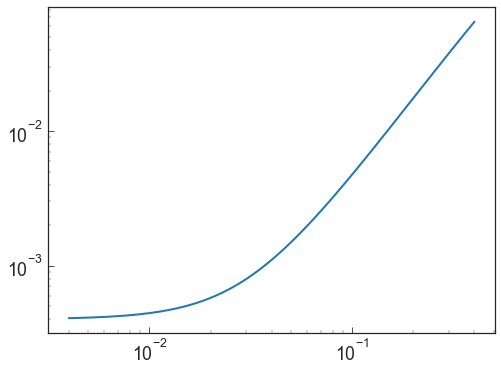

In [271]:
e=0.9999
TT = np.linspace(0.004,0.4,1000)
plt.loglog(TT, 1-Dis(z,res.x,v,TT,e)[-1])

In [262]:
1-Dis(z,res.x,v,0.01,0.9995)[-1]

0.012043430639697483

In [24]:
1-70*4*1e-5

0.9972